# Movie Rating Prediction



## Imports

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Load Dataset

In [ ]:
# Load ratings
ratings = pd.read_csv("u.data", sep="\t",
                      names=["user_id", "movie_id", "rating", "timestamp"])

# Load movies
movies = pd.read_csv("u.item", sep="|", encoding="latin-1",
                     names=["movie_id", "title", "release_date", "video_release", "imdb_url",
                            "unknown","Action","Adventure","Animation","Children","Comedy","Crime",
                            "Documentary","Drama","Fantasy","Film-Noir","Horror","Musical",
                            "Mystery","Romance","Sci-Fi","Thriller","War","Western"])

# Load users
users = pd.read_csv("u.user", sep="|",
                    names=["user_id", "age", "gender", "occupation", "zip"])

ratings.head(), movies.head(), users.head()

(   user_id  movie_id  rating    timestamp
 0      196       242     3.0  881250949.0
 1      186       302     3.0  891717742.0
 2       22       377     1.0  878887116.0
 3      244        51     2.0  880606923.0
 4      166       346     1.0  886397596.0,
    movie_id              title release_date  video_release  \
 0         1   Toy Story (1995)  01-Jan-1995            NaN   
 1         2   GoldenEye (1995)  01-Jan-1995            NaN   
 2         3  Four Rooms (1995)  01-Jan-1995            NaN   
 3         4  Get Shorty (1995)  01-Jan-1995            NaN   
 4         5     Copycat (1995)  01-Jan-1995            NaN   
 
                                             imdb_url  unknown  Action  \
 0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
 1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
 2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
 3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0   

##Initial Snapshot of data and performing basic operations


In [ ]:
df = ratings.merge(movies[["movie_id", "title", "Action","Adventure","Animation",
                           "Children","Comedy","Crime","Documentary","Drama","Fantasy",
                           "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
                           "Thriller","War","Western"]],
                   on="movie_id")

df = df.merge(users[["user_id", "age", "gender", "occupation"]], on="user_id")
print(df)

       user_id  movie_id  rating    timestamp                       title  \
0          196       242     3.0  881250949.0                Kolya (1996)   
1          186       302     3.0  891717742.0    L.A. Confidential (1997)   
2           22       377     1.0  878887116.0         Heavyweights (1994)   
3          244        51     2.0  880606923.0  Legends of the Fall (1994)   
4          166       346     1.0  886397596.0         Jackie Brown (1997)   
...        ...       ...     ...          ...                         ...   
53149      642      1311     3.0  886569715.0    Waiting to Exhale (1995)   
53150      405        29     4.0  885545639.0       Batman Forever (1995)   
53151      151       614     4.0  879528729.0                Giant (1956)   
53152      592       678     2.0  882607690.0              Volcano (1997)   
53153      194         2     NaN          NaN            GoldenEye (1995)   

       Action  Adventure  Animation  Children  Comedy  ...  Musical  Myster

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation
0,196,242,3.0,881250949.0,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,49,M,writer
1,186,302,3.0,891717742.0,L.A. Confidential (1997),0,0,0,0,0,...,0,1,0,0,1,0,0,39,F,executive
2,22,377,1.0,878887116.0,Heavyweights (1994),0,0,0,1,1,...,0,0,0,0,0,0,0,25,M,writer
3,244,51,2.0,880606923.0,Legends of the Fall (1994),0,0,0,0,0,...,0,0,1,0,0,1,1,28,M,technician
4,166,346,1.0,886397596.0,Jackie Brown (1997),0,0,0,0,0,...,0,0,0,0,0,0,0,47,M,educator


In [ ]:
df.isnull().sum()

,0
user_id,0
movie_id,0
rating,1
timestamp,1
title,0
Action,0
Adventure,0
Animation,0
Children,0
Comedy,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53154 entries, 0 to 53153
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      53154 non-null  int64  
 1   movie_id     53154 non-null  int64  
 2   rating       53153 non-null  float64
 3   timestamp    53153 non-null  float64
 4   title        53154 non-null  object 
 5   Action       53154 non-null  int64  
 6   Adventure    53154 non-null  int64  
 7   Animation    53154 non-null  int64  
 8   Children     53154 non-null  int64  
 9   Comedy       53154 non-null  int64  
 10  Crime        53154 non-null  int64  
 11  Documentary  53154 non-null  int64  
 12  Drama        53154 non-null  int64  
 13  Fantasy      53154 non-null  int64  
 14  Film-Noir    53154 non-null  int64  
 15  Horror       53154 non-null  int64  
 16  Musical      53154 non-null  int64  
 17  Mystery      53154 non-null  int64  
 18  Romance      53154 non-null  int64  
 19  Sci-

##Data Cleaning and Feature Engineering ,Exploratory Data Analysis (EDA)

In [ ]:
## Create age groups
def age_group(age):
    if age < 18:
        return 0  # Teen
    elif age <= 30:
        return 1  # Young Adult
    elif age <= 50:
        return 2  # Adult
    else:
        return 3  # Senior

df['age_group'] = df['age'].apply(age_group)
df = df.drop('age', axis=1)

In [ ]:
df.sample()

,user_id,movie_id,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender,occupation,age_group
27801,130,929,4.0,876251160.0,Harriet the Spy (1996),0,0,0,1,1,...,0,0,0,0,0,0,0,M,none,1


In [ ]:
df["gender"] = df["gender"].map({"M": 1, "F": 0})
df["gender"] = df["gender"].astype(int)

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender,occupation,age_group
0,196,242,3.0,881250949.0,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,1,writer,2
1,186,302,3.0,891717742.0,L.A. Confidential (1997),0,0,0,0,0,...,0,1,0,0,1,0,0,0,executive,2
2,22,377,1.0,878887116.0,Heavyweights (1994),0,0,0,1,1,...,0,0,0,0,0,0,0,1,writer,1
3,244,51,2.0,880606923.0,Legends of the Fall (1994),0,0,0,0,0,...,0,0,1,0,0,1,1,1,technician,1
4,166,346,1.0,886397596.0,Jackie Brown (1997),0,0,0,0,0,...,0,0,0,0,0,0,0,1,educator,2


In [ ]:
#Dropping user_id, movie_id, timestamp as they are just an identifier and not describing the movie features
df = df.drop(columns=["user_id", "movie_id", "timestamp"])
df.sample()

,rating,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender,occupation,age_group
44947,1.0,Kansas City (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,educator,2


In [ ]:
df = df.drop(columns="title")
df.sample()

,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender,occupation,age_group
15738,4.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,student,1


In [ ]:
occupation_counts = df["occupation"].value_counts()
popular = occupation_counts[occupation_counts > 50].index
df["occupation_grouped"] = df["occupation"].apply(lambda x: x if x in popular else 'Other')
df = pd.get_dummies(df, columns=["occupation_grouped"], drop_first=True)
df = df.drop(columns="occupation")

In [ ]:
df.dtypes

,0
rating,float64
Action,int64
Adventure,int64
Animation,int64
Children,int64
Comedy,int64
Crime,int64
Documentary,int64
Drama,int64
Fantasy,int64


In [ ]:
genre_cols = ["Action","Adventure","Animation","Children","Comedy","Crime",
              "Documentary","Drama","Fantasy","Film-Noir","Horror","Musical",
              "Mystery","Romance","Sci-Fi","Thriller","War","Western"]
for col in genre_cols:
    df[f"{col}_gender"] = df[col] * df["gender"]

In [ ]:
# First, remove rows where 'rating' is NaN.
df.dropna(subset=['rating'], inplace=True)
# Now, convert the DataFrame to int, which should work as no NaNs remain in float columns.
df = df.astype(int)
df.sample()

,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Fantasy_gender,Film-Noir_gender,Horror_gender,Musical_gender,Mystery_gender,Romance_gender,Sci-Fi_gender,Thriller_gender,War_gender,Western_gender
42074,5,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.dtypes #Making it ready for ml

,0
rating,int64
Action,int64
Adventure,int64
Animation,int64
Children,int64
Comedy,int64
Crime,int64
Documentary,int64
Drama,int64
Fantasy,int64


In [ ]:
df.head()

,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Fantasy_gender,Film-Noir_gender,Horror_gender,Musical_gender,Mystery_gender,Romance_gender,Sci-Fi_gender,Thriller_gender,War_gender,Western_gender
0,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.isnull().sum())

rating                              0
Action                              0
Adventure                           0
Animation                           0
Children                            0
Comedy                              0
Crime                               0
Documentary                         0
Drama                               0
Fantasy                             0
Film-Noir                           0
Horror                              0
Musical                             0
Mystery                             0
Romance                             0
Sci-Fi                              0
Thriller                            0
War                                 0
Western                             0
gender                              0
age_group                           0
occupation_grouped_artist           0
occupation_grouped_doctor           0
occupation_grouped_educator         0
occupation_grouped_engineer         0
occupation_grouped_entertainment    0
occupation_g

##Ml

##Data for training

In [ ]:
X = df.drop('rating', axis=1)
y = df['rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Training the models

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##Prediction & Evaluation


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("for Linear regression :")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

for Linear regression :
RMSE: 1.1024156834562702
MAE: 0.9078213383406242
R2 Score: 0.05288425181692524


In [ ]:
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("for Random Forest :")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

for Random Forest :
RMSE: 1.1199314164205507
MAE: 0.9019498006179133
R2 Score: 0.022548658184759707


In [ ]:
tolerance = 1
accuracy_lr = np.mean(np.abs(y_test - y_pred) <= tolerance) * 100
accuracy_rf = np.mean(np.abs(y_test - y_pred_rf) <= tolerance) * 100

print(f"Linear Regression Accuracy ±1: {accuracy_lr:.2f}%")
print(f"Random Forest Accuracy ±1: {accuracy_rf:.2f}%")

Linear Regression Accuracy ±1: 60.78%
Random Forest Accuracy ±1: 62.54%


## Visualization


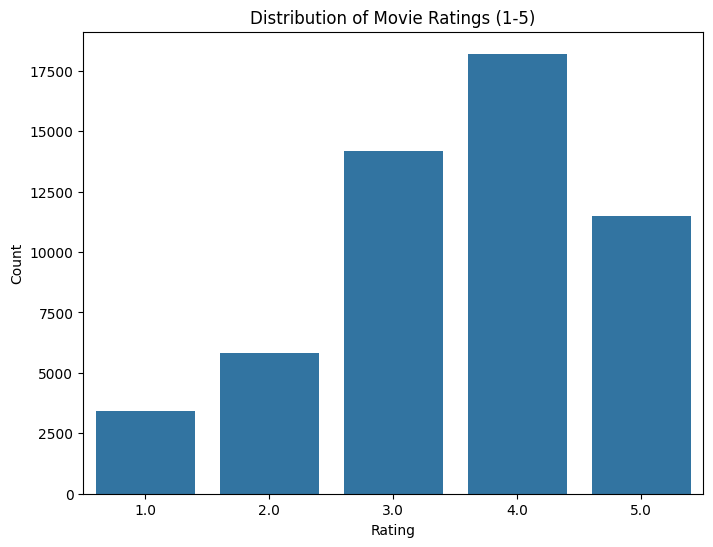

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings, legend=False)
plt.title('Distribution of Movie Ratings (1-5)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

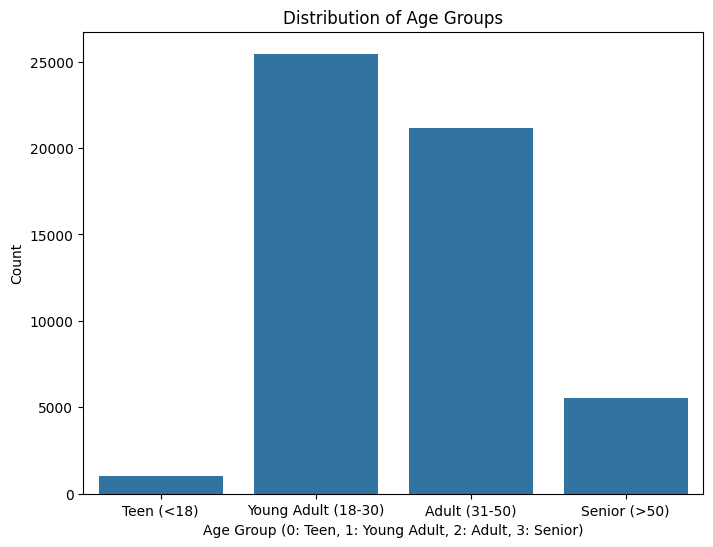

In [ ]:
#Bar plots to visualize the distribution of 'age_group' and 'gender' within the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=df)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group (0: Teen, 1: Young Adult, 2: Adult, 3: Senior)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Teen (<18)', 'Young Adult (18-30)', 'Adult (31-50)', 'Senior (>50)'])
plt.show()

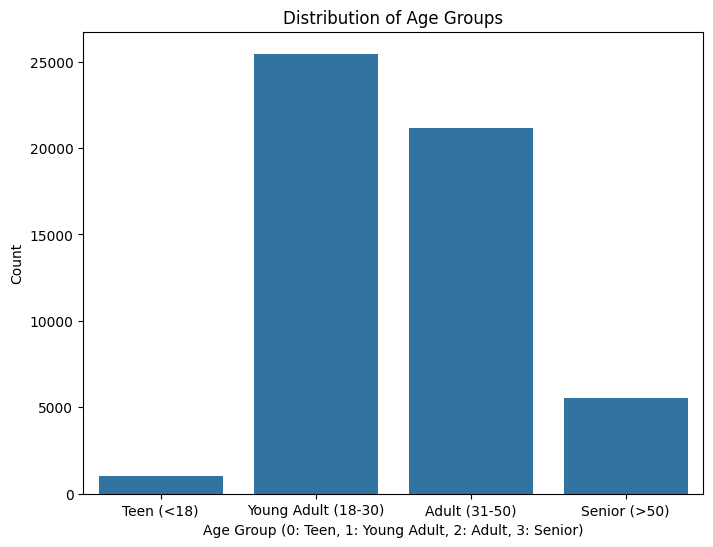

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=df, legend=False)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group (0: Teen, 1: Young Adult, 2: Adult, 3: Senior)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Teen (<18)', 'Young Adult (18-30)', 'Adult (31-50)', 'Senior (>50)'])
plt.show()

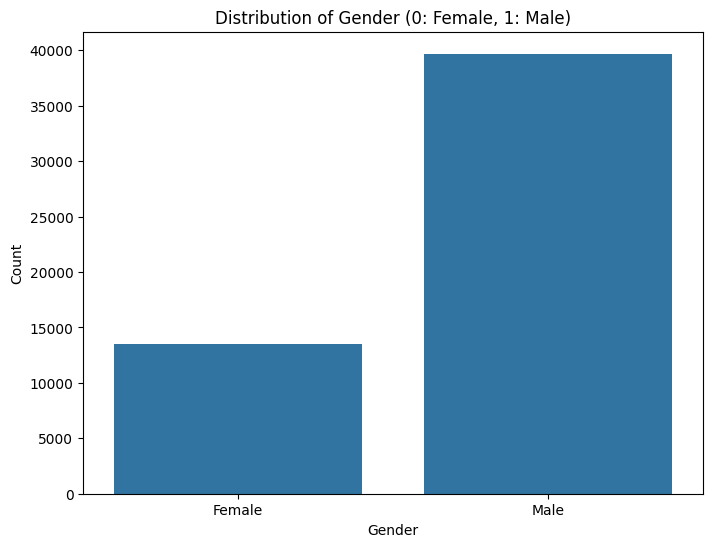

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df,legend=False)
plt.title('Distribution of Gender (0: Female, 1: Male)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

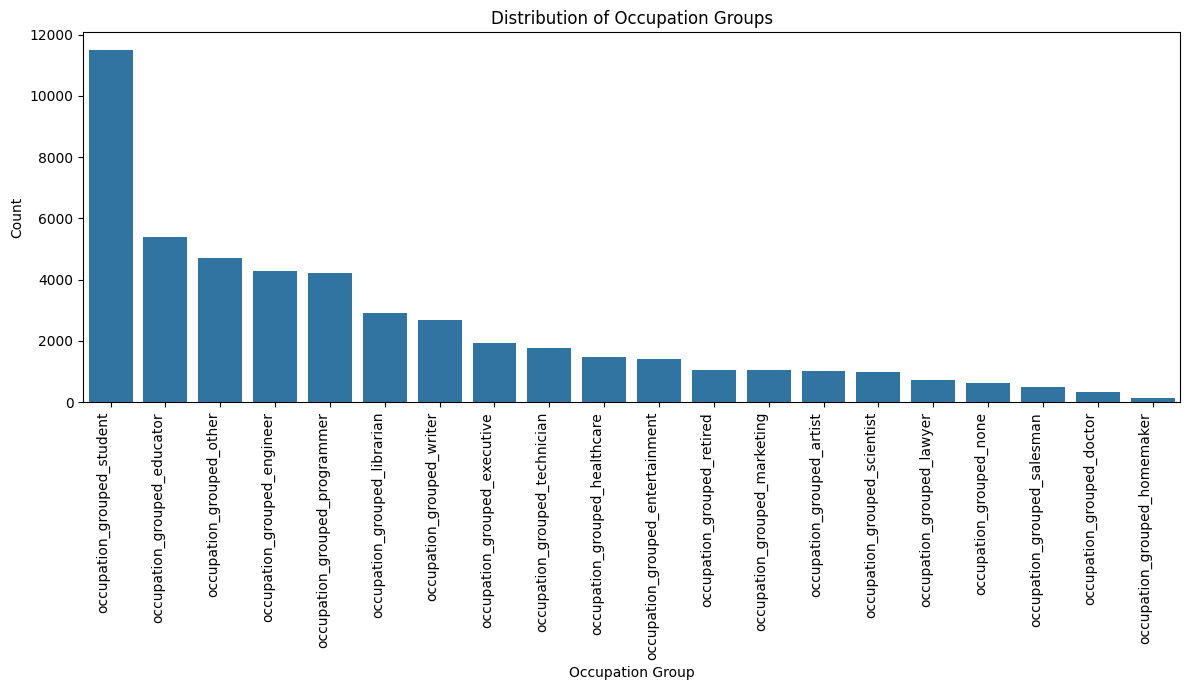

In [ ]:
#Distribution of the top occupation_grouped categories
occupation_cols = [col for col in df.columns if col.startswith('occupation_grouped_')]
occupation_sums = df[occupation_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=occupation_sums.index, y=occupation_sums.values, legend=False)
plt.title('Distribution of Occupation Groups')
plt.xlabel('Occupation Group')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

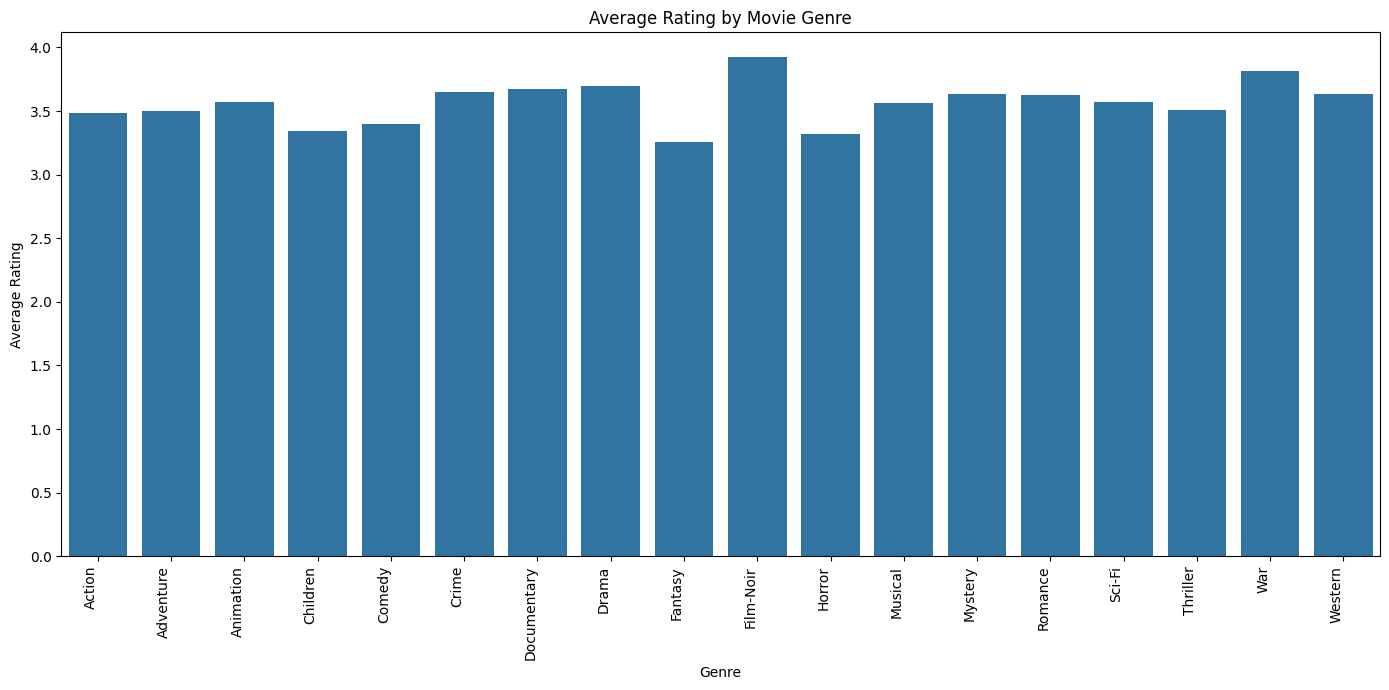

In [ ]:
#Average rating for each movie genre, gender, and age group
genre_cols = ["Action","Adventure","Animation","Children","Comedy","Crime",
              "Documentary","Drama","Fantasy","Film-Noir","Horror","Musical",
              "Mystery","Romance","Sci-Fi","Thriller","War","Western"]

avg_ratings_by_genre = {}
for genre in genre_cols:
    avg_ratings_by_genre[genre] = df[df[genre] == 1]['rating'].mean()

avg_ratings_genre_df = pd.DataFrame(list(avg_ratings_by_genre.items()), columns=['Genre', 'Average Rating'])

plt.figure(figsize=(14, 7))
sns.barplot(x='Genre', y='Average Rating', data=avg_ratings_genre_df)
plt.title('Average Rating by Movie Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation= 90,  ha='right')
plt.tight_layout()
plt.show()

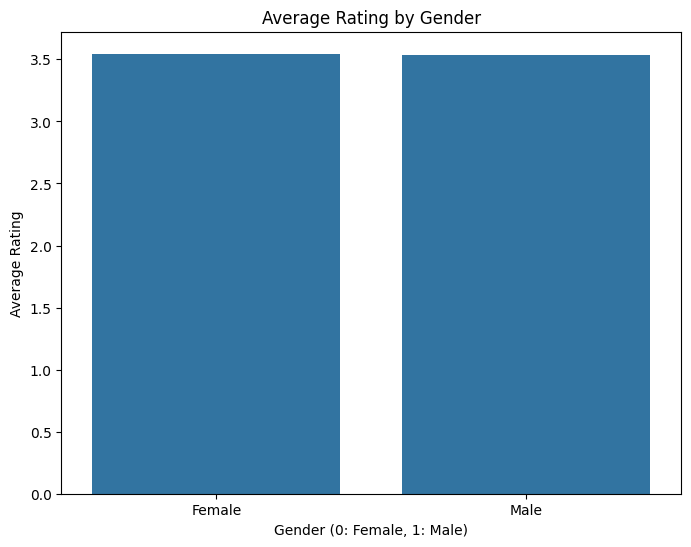

In [ ]:
avg_ratings_by_gender = df.groupby('gender')['rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='rating', data=avg_ratings_by_gender, legend=False)
plt.title('Average Rating by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

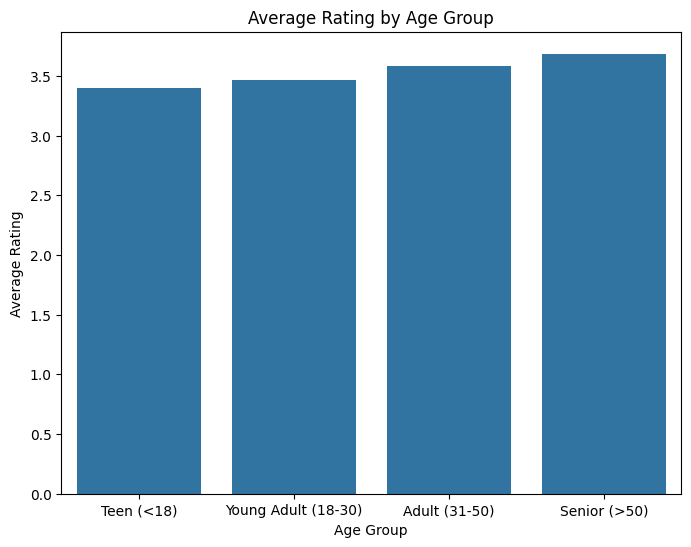

In [ ]:
avg_ratings_by_age_group = df.groupby('age_group')['rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='age_group', y='rating', data=avg_ratings_by_age_group, legend=False)
plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Teen (<18)', 'Young Adult (18-30)', 'Adult (31-50)', 'Senior (>50)'])
plt.show()

## Calculation of Mean User and Movie Ratings

In [ ]:
#Average rating given by each user
avg_rating_per_user = ratings.groupby('user_id')['rating'].mean()
print("Average rating per user:\n", avg_rating_per_user.head())


Average rating per user:
 user_id
1    3.559633
2    3.591837
3    2.770833
4    4.277778
5    2.829787
Name: rating, dtype: float64


In [ ]:
#Average rating received by each movie
avg_rating_per_movie = ratings.groupby('movie_id')['rating'].mean()
print("Average rating per movie:\n", avg_rating_per_movie.head())

Average rating per movie:
 movie_id
1    3.888889
2    3.062500
3    3.080000
4    3.638095
5    3.326923
Name: rating, dtype: float64


## Merge New Features to DataFrame

Integrated the calculated mean user and movie ratings into the main DataFrame (`df`) as new features


In [ ]:
#Calculated mean user and movie ratings into the main DataFrame
df_temp = ratings.merge(movies[["movie_id", "title", "Action","Adventure","Animation",
                           "Children","Comedy","Crime","Documentary","Drama","Fantasy",
                           "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
                           "Thriller","War","Western"]],
                   on="movie_id")

df_temp = df_temp.merge(users[["user_id", "age", "gender", "occupation"]], on="user_id")

df_temp = df_temp.merge(avg_rating_per_user.rename('user_avg_rating'), on='user_id', how='left')
df_temp = df_temp.merge(avg_rating_per_movie.rename('movie_avg_rating'), on='movie_id', how='left')

print(df_temp.head())

   user_id  movie_id  rating    timestamp                       title  Action  \
0      196       242     3.0  881250949.0                Kolya (1996)       0   
1      186       302     3.0  891717742.0    L.A. Confidential (1997)       0   
2       22       377     1.0  878887116.0         Heavyweights (1994)       0   
3      244        51     2.0  880606923.0  Legends of the Fall (1994)       0   
4      166       346     1.0  886397596.0         Jackie Brown (1997)       0   

   Adventure  Animation  Children  Comedy  ...  Romance  Sci-Fi  Thriller  \
0          0          0         0       1  ...        0       0         0   
1          0          0         0       0  ...        0       0         1   
2          0          0         1       1  ...        0       0         0   
3          0          0         0       0  ...        1       0         0   
4          0          0         0       0  ...        0       0         0   

   War  Western  age  gender  occupation  user_avg

In [ ]:
# Re-initialize df_temp to ensure 'age' column is present
df_temp = ratings.merge(movies[["movie_id", "title", "Action","Adventure","Animation",
                           "Children","Comedy","Crime","Documentary","Drama","Fantasy",
                           "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
                           "Thriller","War","Western"]],
                   on="movie_id")
df_temp = df_temp.merge(users[["user_id", "age", "gender", "occupation"]], on="user_id")
df_temp = df_temp.merge(avg_rating_per_user.rename('user_avg_rating'), on='user_id', how='left')
df_temp = df_temp.merge(avg_rating_per_movie.rename('movie_avg_rating'), on='movie_id', how='left')

def age_group(age):
    if age < 18:
        return 0  # Teen
    elif age <= 30:
        return 1  # Young Adult
    elif age <= 50:
        return 2  # Adult
    else:
        return 3  # Senior

df_temp['age_group'] = df_temp['age'].apply(age_group)
df_temp = df_temp.drop('age', axis=1)

df_temp["gender"] = df_temp["gender"].map({"M": 1, "F": 0})
df_temp["gender"] = df_temp["gender"].astype(int)

occupation_counts_temp = df_temp["occupation"].value_counts()
popular_temp = occupation_counts_temp[occupation_counts_temp > 50].index
df_temp["occupation_grouped"] = df_temp["occupation"].apply(lambda x: x if x in popular_temp else 'Other')
df_temp = pd.get_dummies(df_temp, columns=["occupation_grouped"], drop_first=True)
df_temp = df_temp.drop(columns="occupation")

genre_cols = ["Action","Adventure","Animation","Children","Comedy","Crime",
              "Documentary","Drama","Fantasy","Film-Noir","Horror","Musical",
              "Mystery","Romance","Sci-Fi","Thriller","War","Western"]
for col in genre_cols:
    df_temp[f"{col}_gender"] = df_temp[col] * df_temp["gender"]

df_temp = df_temp.drop(columns=["user_id", "movie_id", "timestamp", "title"])

# Drop rows with any NaN values before converting to int
df_temp.dropna(inplace=True)

df = df_temp.astype(int)

print(df.head())

   rating  Action  Adventure  Animation  Children  Comedy  Crime  Documentary  \
0       3       0          0          0         0       1      0            0   
1       3       0          0          0         0       0      1            0   
2       1       0          0          0         1       1      0            0   
3       2       0          0          0         0       0      0            0   
4       1       0          0          0         0       0      1            0   

   Drama  Fantasy  ...  Fantasy_gender  Film-Noir_gender  Horror_gender  \
0      0        0  ...               0                 0              0   
1      0        0  ...               0                 0              0   
2      0        0  ...               0                 0              0   
3      1        0  ...               0                 0              0   
4      1        0  ...               0                 0              0   

   Musical_gender  Mystery_gender  Romance_gender  Sci-Fi_gend

## Retrain Random Forest with New Features


In [ ]:
#Split the data into training and testing sets with the expanded feature, and then retrained the Random Forest Regressor model.
X_new = df.drop('rating', axis=1)
y_new = df['rating']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

rf_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_new.fit(X_train_new, y_train_new)

y_pred_rf_new = rf_new.predict(X_test_new)

## Evaluated the Improved Random Forest Model

Evaluate the retrained Random Forest model using metrics : RMSE, MAE, R2 Score, and the custom accuracy within +/- 1 tolerance, and compare these results to the previous model.


In [ ]:
mae_new = mean_absolute_error(y_test_new, y_pred_rf_new)
rmse_new = np.sqrt(mean_squared_error(y_test_new, y_pred_rf_new))
r2_new = r2_score(y_test_new, y_pred_rf_new)

tolerance = 1
accuracy_rf_new = np.mean(np.abs(y_test_new - y_pred_rf_new) <= tolerance) * 100

print("For new Random Forest model (with new features):")
print(f"RMSE: {rmse_new}")
print(f"MAE: {mae_new}")
print(f"R2 Score: {r2_new}")
print(f"Accuracy \u00b11: {accuracy_rf_new:.2f}%\n")

print("Comparison with previous Random Forest model:")
print(f"Previous RF RMSE: {rmse} (New: {rmse_new}) - Change: {rmse_new - rmse:.4f}")
print(f"Previous RF MAE: {mae} (New: {mae_new}) - Change: {mae_new - mae:.4f}")
print(f"Previous RF R2 Score: {r2} (New: {r2_new}) - Change: {r2_new - r2:.4f}")
print(f"Previous RF Accuracy \u00b11: {accuracy_rf:.2f}% (New: {accuracy_rf_new:.2f}%) - Change: {accuracy_rf_new - accuracy_rf:.2f}%")

if rmse_new < rmse and mae_new < mae and r2_new > r2 and accuracy_rf_new > accuracy_rf:
    print("\nObservation: The new Random Forest model shows improvement across all metrics.")
elif rmse_new < rmse or mae_new < mae or r2_new > r2 or accuracy_rf_new > accuracy_rf:
    print("\nObservation: The new Random Forest model shows some improvement in certain metrics.")
else:
    print("\nObservation: The new Random Forest model does not show significant improvement or might have degraded.")

For new Random Forest model (with new features):
RMSE: 1.0214707582000482
MAE: 0.8062126147118599
R2 Score: 0.1868621655034658
Accuracy ±1: 69.42%

Comparison with previous Random Forest model:
Previous RF RMSE: 1.1199314164205507 (New: 1.0214707582000482) - Change: -0.0985
Previous RF MAE: 0.9019498006179133 (New: 0.8062126147118599) - Change: -0.0957
Previous RF R2 Score: 0.022548658184759707 (New: 0.1868621655034658) - Change: 0.1643
Previous RF Accuracy ±1: 62.54% (New: 69.42%) - Change: 6.88%

Observation: The new Random Forest model shows improvement across all metrics.


## Improvents in Final results

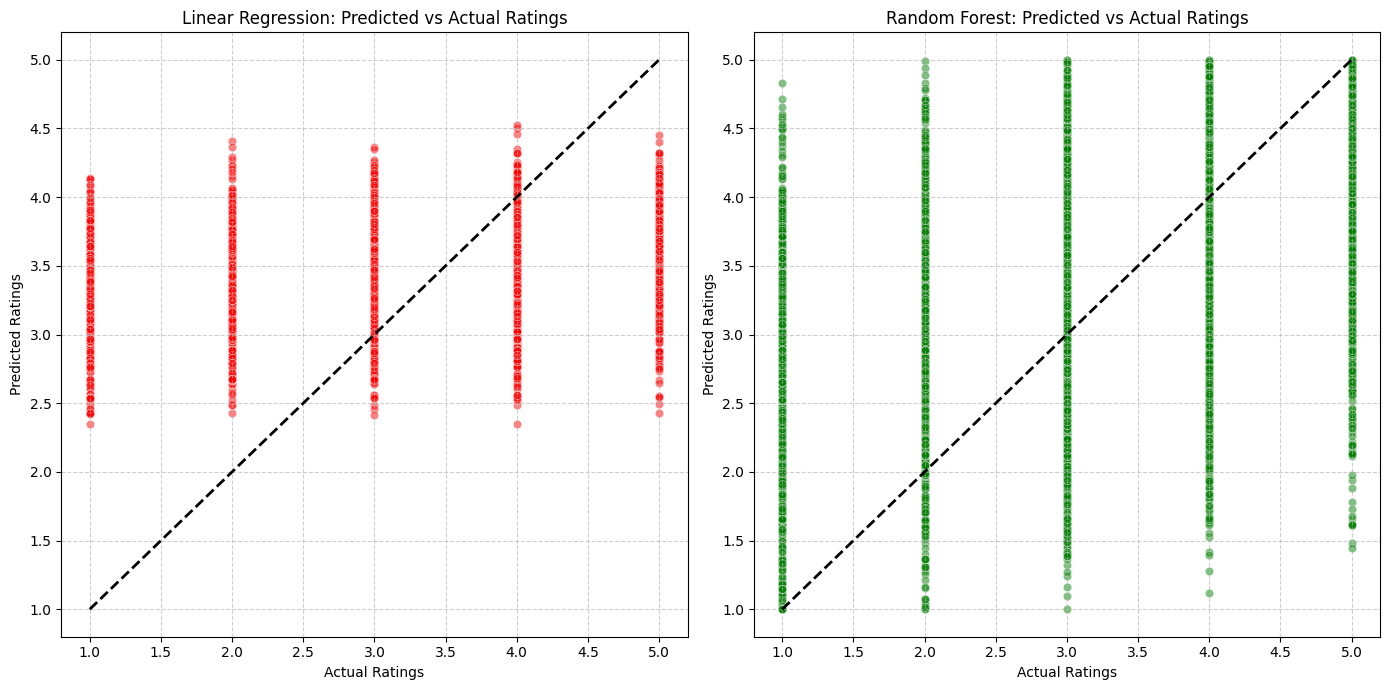

In [ ]:
plt.figure(figsize=(14, 7))

# Linear Regression Predictions vs Actual
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Identity line
plt.title('Linear Regression: Predicted vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True, linestyle='--', alpha=0.6)

# Random Forest Predictions vs Actual
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(x=y_test_new, y=y_pred_rf_new, alpha=0.5, color='green')
plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'k--', lw=2) # Identity line
plt.title('Random Forest: Predicted vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()